<a href="https://colab.research.google.com/github/charlie-51135/Intro-to-ML/blob/main/Homework6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import torch
import torch.optim as optim
import torch.nn as nn
import matplotlib.pyplot as plt
from google.colab import drive
from sklearn.preprocessing import StandardScaler
drive.mount('/content/drive')
torch.set_printoptions(edgeitems=2, linewidth=75)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Problem 1: SGD**

In [ ]:
def training_loop_val(n_epochs, optimizer, model, loss_fn, X_train, y_train, X_val, y_val):
    train_losses = []
    val_losses = []
    for epoch in range(1, n_epochs + 1):
        train_y_pred = model(X_train)
        train_loss = loss_fn(train_y_pred, y_train)
        train_losses.append(train_loss.item())

        val_y_pred = model(X_val)
        val_loss = loss_fn(val_y_pred, y_val)
        val_losses.append(val_loss.item())

        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()

        if epoch % 500 == 0:
            print(f'Epoch {epoch}, \tTrain Loss {train_loss:.1f}, \tVal Loss {val_loss:.1f}')

    return train_losses, val_losses

file_path = '/content/drive/MyDrive/Intro-to-ML/Housing.csv'
housing = pd.read_csv(file_path)
# Check for null values
#housing.isnull().sum()*100/housing.shape[0]

# Replace yes/no data
varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
housing[varlist] = housing[varlist].apply(lambda x: x.map({'yes': 1, 'no': 0}))

# Split training and test data
input_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']
y = housing.pop('price')
X = housing[input_vars]

# Apply standardization
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Convert to tensors
X_tensor = torch.tensor(X_std, dtype=torch.float32)
y_tensor = torch.tensor(y.values, dtype=torch.float32).view(-1, 1)

# Split training and test data
torch.manual_seed(123)
n_samples = X_tensor.shape[0]
n_val = int(n_samples * 0.2)
shuffled_indices = torch.randperm(n_samples)

train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]

X_train = X_tensor[train_indices]
y_train = y_tensor[train_indices]

X_val = X_tensor[val_indices]
y_val = y_tensor[val_indices]

# **Problem 1a: 11 features, SGD, one hidden layer**


Learning rate = 0.01

Epoch 500, 	Train Loss 1748731953152.0, 	Val Loss 1337873399808.0
Epoch 1000, 	Train Loss 1729784709120.0, 	Val Loss 1319198654464.0
Epoch 1500, 	Train Loss 1721985531904.0, 	Val Loss 1308622716928.0
Epoch 2000, 	Train Loss 1717005713408.0, 	Val Loss 1301727150080.0
Epoch 2500, 	Train Loss 1713369513984.0, 	Val Loss 1297198481408.0
Epoch 3000, 	Train Loss 1710577549312.0, 	Val Loss 1294235074560.0
Epoch 3500, 	Train Loss 1708369510400.0, 	Val Loss 1292324175872.0
Epoch 4000, 	Train Loss 1706582081536.0, 	Val Loss 1291133386752.0
Epoch 4500, 	Train Loss 1705106341888.0, 	Val Loss 1290442768384.0
Epoch 5000, 	Train Loss 1703866007552.0, 	Val Loss 1290103685120.0


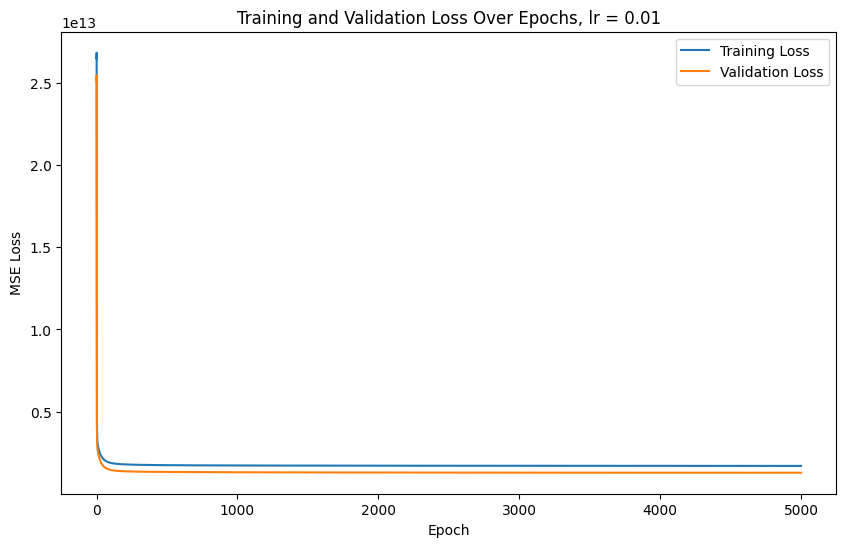


Learning rate = 0.001

Epoch 500, 	Train Loss 1934368964608.0, 	Val Loss 1673174450176.0
Epoch 1000, 	Train Loss 1680379346944.0, 	Val Loss 1481561735168.0
Epoch 1500, 	Train Loss 1585454252032.0, 	Val Loss 1429978611712.0
Epoch 2000, 	Train Loss 1544219262976.0, 	Val Loss 1418871439360.0
Epoch 2500, 	Train Loss 1524143095808.0, 	Val Loss 1419809914880.0
Epoch 3000, 	Train Loss 1513315237888.0, 	Val Loss 1423880486912.0
Epoch 3500, 	Train Loss 1506907652096.0, 	Val Loss 1428284112896.0
Epoch 4000, 	Train Loss 1502796972032.0, 	Val Loss 1432224792576.0
Epoch 4500, 	Train Loss 1499976957952.0, 	Val Loss 1435556511744.0
Epoch 5000, 	Train Loss 1497934331904.0, 	Val Loss 1438326718464.0


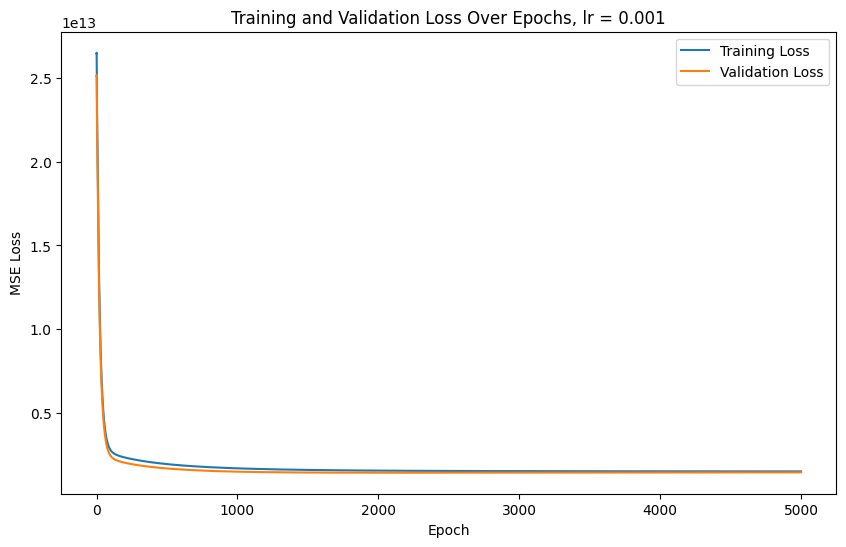


Learning rate = 0.0001

Epoch 500, 	Train Loss 14626354888704.0, 	Val Loss 13996186927104.0
Epoch 1000, 	Train Loss 9029188321280.0, 	Val Loss 8743623327744.0
Epoch 1500, 	Train Loss 6283755782144.0, 	Val Loss 6127484928000.0
Epoch 2000, 	Train Loss 4873561047040.0, 	Val Loss 4748120948736.0
Epoch 2500, 	Train Loss 4100694212608.0, 	Val Loss 3967400542208.0
Epoch 3000, 	Train Loss 3639200710656.0, 	Val Loss 3486247550976.0
Epoch 3500, 	Train Loss 3335331512320.0, 	Val Loss 3161837273088.0
Epoch 4000, 	Train Loss 3115560730624.0, 	Val Loss 2924468502528.0
Epoch 4500, 	Train Loss 2943997706240.0, 	Val Loss 2739139510272.0
Epoch 5000, 	Train Loss 2802550833152.0, 	Val Loss 2587551072256.0


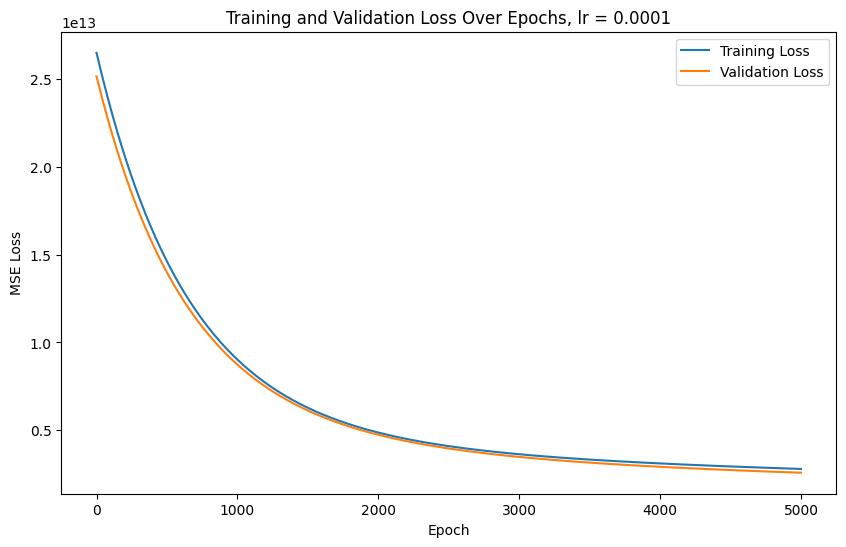

In [ ]:
for learning_rate in [0.01, 0.001, 0.0001]:
    torch.manual_seed(123)
    print(f'\nLearning rate = {learning_rate}\n')

    seq_model = nn.Sequential(
                nn.Linear(11, 32),
                nn.Tanh(),
                nn.Linear(32, 1))
    optimizer = optim.SGD(seq_model.parameters(), lr=learning_rate)

    train_losses, val_losses = training_loop_val(
        n_epochs = 5000,
        optimizer = optimizer,
        model = seq_model,
        loss_fn = nn.MSELoss(),
        X_train = X_train,
        y_train = y_train,
        X_val = X_val,
        y_val = y_val)
    # print(f'\nParams = {trained_model}\n')

    plt.figure(figsize=(10, 6))
    plt.plot(train_losses, label='Training Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('MSE Loss')
    plt.title(f'Training and Validation Loss Over Epochs, lr = {learning_rate}')
    plt.legend()
    plt.show()

# **Problem 1b: 11 features, SGD, three hidden layers**


Learning rate = 0.01

Epoch 500, 	Train Loss 3549377069056.0, 	Val Loss 3265555595264.0
Epoch 1000, 	Train Loss 3549377069056.0, 	Val Loss 3265555595264.0
Epoch 1500, 	Train Loss 3549377069056.0, 	Val Loss 3265555595264.0
Epoch 2000, 	Train Loss 3549377069056.0, 	Val Loss 3265555595264.0
Epoch 2500, 	Train Loss 3549377069056.0, 	Val Loss 3265555595264.0
Epoch 3000, 	Train Loss 3549377069056.0, 	Val Loss 3265555595264.0
Epoch 3500, 	Train Loss 3549377069056.0, 	Val Loss 3265555595264.0
Epoch 4000, 	Train Loss 3549377069056.0, 	Val Loss 3265555595264.0
Epoch 4500, 	Train Loss 3549377069056.0, 	Val Loss 3265555595264.0
Epoch 5000, 	Train Loss 3549377069056.0, 	Val Loss 3265555595264.0


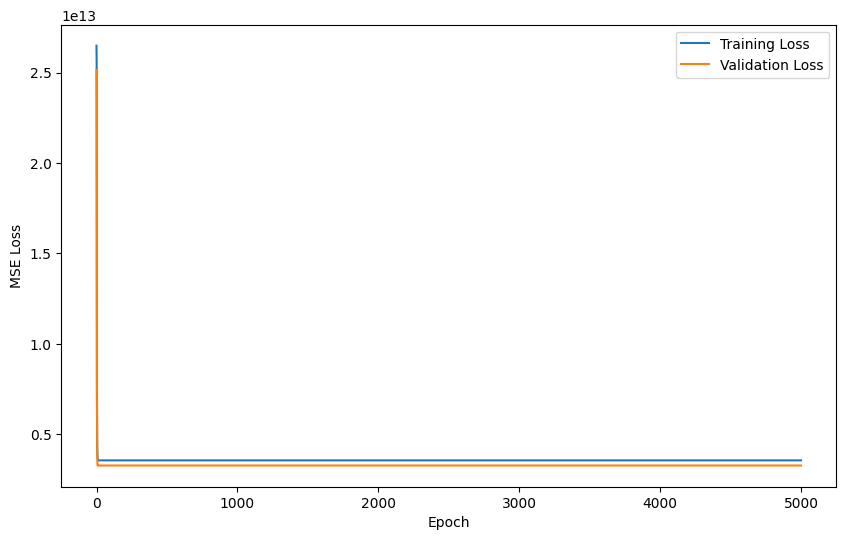


Learning rate = 0.001

Epoch 500, 	Train Loss 3549376806912.0, 	Val Loss 3265553760256.0
Epoch 1000, 	Train Loss 3549376806912.0, 	Val Loss 3265553760256.0
Epoch 1500, 	Train Loss 3549376806912.0, 	Val Loss 3265553760256.0
Epoch 2000, 	Train Loss 3549376806912.0, 	Val Loss 3265553760256.0
Epoch 2500, 	Train Loss 3549376806912.0, 	Val Loss 3265553760256.0
Epoch 3000, 	Train Loss 3549376806912.0, 	Val Loss 3265553760256.0
Epoch 3500, 	Train Loss 3549376806912.0, 	Val Loss 3265553760256.0
Epoch 4000, 	Train Loss 3549376806912.0, 	Val Loss 3265553760256.0
Epoch 4500, 	Train Loss 3549376806912.0, 	Val Loss 3265553760256.0
Epoch 5000, 	Train Loss 3549376806912.0, 	Val Loss 3265553760256.0


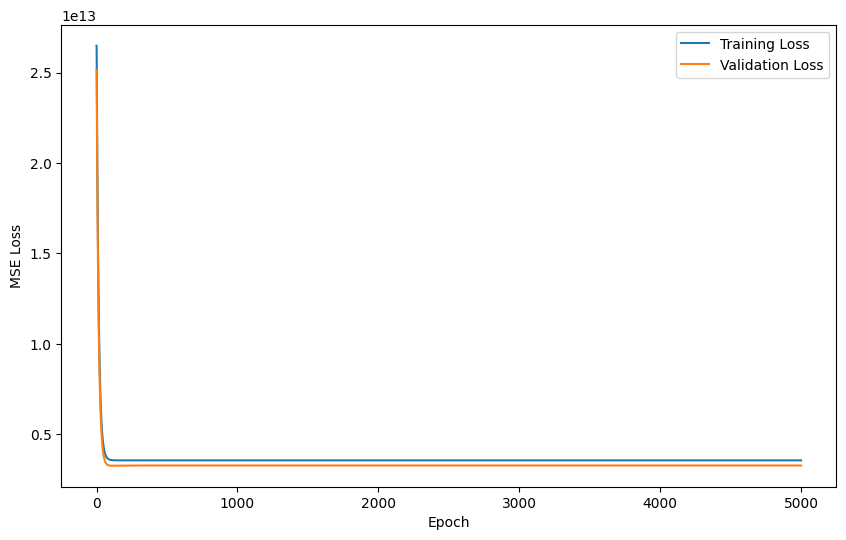


Learning rate = 0.0001

Epoch 500, 	Train Loss 4320431964160.0, 	Val Loss 3842717515776.0
Epoch 1000, 	Train Loss 3574961274880.0, 	Val Loss 3255821139968.0
Epoch 1500, 	Train Loss 3550225629184.0, 	Val Loss 3259970879488.0
Epoch 2000, 	Train Loss 3549404856320.0, 	Val Loss 3264411860992.0
Epoch 2500, 	Train Loss 3549377593344.0, 	Val Loss 3265342472192.0
Epoch 3000, 	Train Loss 3549376806912.0, 	Val Loss 3265514176512.0
Epoch 3500, 	Train Loss 3549377069056.0, 	Val Loss 3265538555904.0
Epoch 4000, 	Train Loss 3549377069056.0, 	Val Loss 3265538555904.0
Epoch 4500, 	Train Loss 3549377069056.0, 	Val Loss 3265538555904.0
Epoch 5000, 	Train Loss 3549377069056.0, 	Val Loss 3265538555904.0


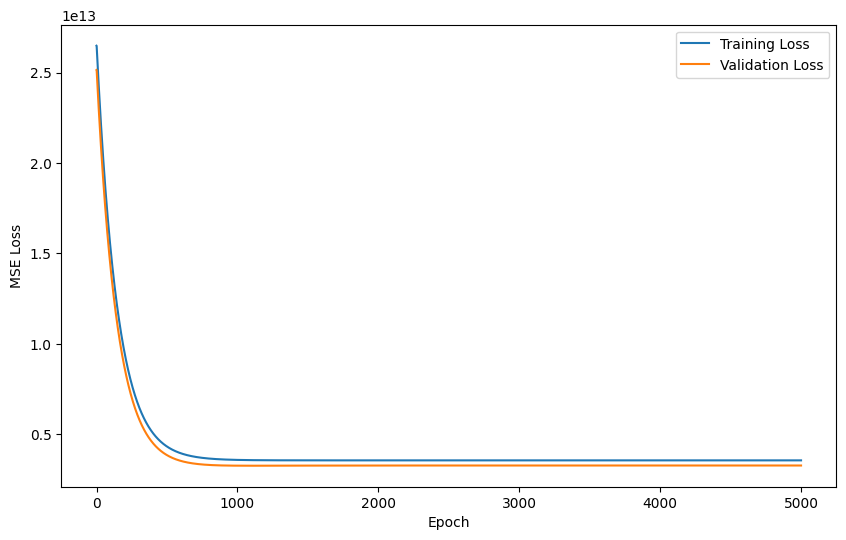

In [ ]:
for learning_rate in [0.01, 0.001, 0.0001]:
    torch.manual_seed(123)
    print(f'\nLearning rate = {learning_rate}\n')

    seq_model = nn.Sequential(
                nn.Linear(11, 32),
                nn.Tanh(),
                nn.Linear(32, 64),
                nn.Tanh(),
                nn.Linear(64, 16),
                nn.Tanh(),
                nn.Linear(16, 1))
    optimizer = optim.SGD(seq_model.parameters(), lr=learning_rate)

    train_losses, val_losses = training_loop_val(
        n_epochs = 5000,
        optimizer = optimizer,
        model = seq_model,
        loss_fn = nn.MSELoss(),
        X_train = X_train,
        y_train = y_train,
        X_val = X_val,
        y_val = y_val)
    # print(f'\nParams = {trained_model}\n')

    plt.figure(figsize=(10, 6))
    plt.plot(train_losses, label='Training Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('MSE Loss')
    # plt.title(f'Training and Validation Loss Over Epochs, lr = {learning_rate}')
    plt.legend()
    plt.show()


Learning rate = 1000

Epoch 500, 	Train Loss 3605391736832.0, 	Val Loss 3269310283776.0
Epoch 1000, 	Train Loss 3549377331200.0, 	Val Loss 3265428979712.0
Epoch 1500, 	Train Loss 3549376806912.0, 	Val Loss 3265552973824.0
Epoch 2000, 	Train Loss 3549376806912.0, 	Val Loss 3265553235968.0
Epoch 2500, 	Train Loss 3549376806912.0, 	Val Loss 3265553760256.0
Epoch 3000, 	Train Loss 3549376806912.0, 	Val Loss 3265554284544.0
Epoch 3500, 	Train Loss 3549376806912.0, 	Val Loss 3265554284544.0
Epoch 4000, 	Train Loss 3549377069056.0, 	Val Loss 3265554808832.0
Epoch 4500, 	Train Loss 3549377069056.0, 	Val Loss 3265554808832.0
Epoch 5000, 	Train Loss 3549377069056.0, 	Val Loss 3265555070976.0


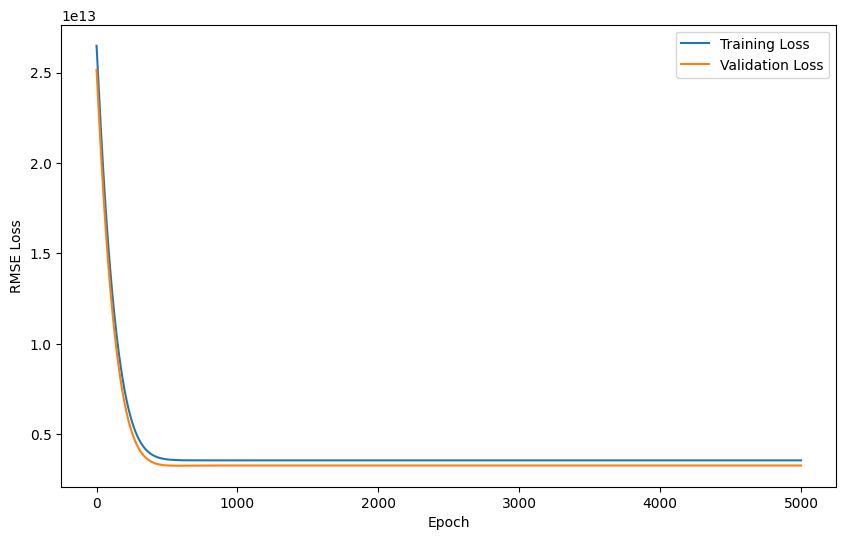

In [ ]:
for learning_rate in [1000]:
    print(f'\nLearning rate = {learning_rate}\n')

    seq_model = nn.Sequential(
                nn.Linear(11, 32),
                nn.Tanh(),
                nn.Linear(32, 64),
                nn.Tanh(),
                nn.Linear(64, 16),
                nn.Tanh(),
                nn.Linear(16, 1))
    optimizer = optim.Adam(seq_model.parameters(), lr=learning_rate)

    train_losses, val_losses = training_loop_val(
        n_epochs = 5000,
        optimizer = optimizer,
        model = seq_model,
        loss_fn = nn.MSELoss(),
        X_train = X_train,
        y_train = y_train,
        X_val = X_val,
        y_val = y_val)
    # print(f'\nParams = {trained_model}\n')

    plt.figure(figsize=(10, 6))
    plt.plot(train_losses, label='Training Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('MSE Loss')
    plt.title(f'Training and Validation Loss Over Epochs, lr = {learning_rate}')
    plt.legend()
    plt.show()

# **Problem 2a: 10 classes in CIFAR-10, SGD, one hidden layer**

In [27]:
from matplotlib import pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms

print(torch.cuda.is_available())
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

torch.set_printoptions(edgeitems=2)
torch.manual_seed(123)

cifar10 = datasets.CIFAR10('data', train=True, download=True,
                          transform=transforms.ToTensor())

False
Files already downloaded and verified


In [29]:
imgs = torch.stack([img for img, _ in cifar10], dim=3)
print(imgs.shape)
print(imgs.view(3, -1).mean(dim=1))
print(imgs.view(3, -1).std(dim=1))

torch.Size([3, 32, 32, 50000])
tensor([0.4914, 0.4822, 0.4465])
tensor([0.2470, 0.2435, 0.2616])


In [30]:
cifar10 = datasets.CIFAR10('data', train=True, download=True,
                          transform=transforms.Compose([
                              transforms.ToTensor(),
                              transforms.Normalize((0.4914, 0.4822, 0.4465),
                                                   (0.2470, 0.2435, 0.2616))
                          ]))
cifar10_val = datasets.CIFAR10('data', train=False, download=True,
                          transform=transforms.Compose([
                              transforms.ToTensor(),
                              transforms.Normalize((0.4914, 0.4822, 0.4465),
                                                   (0.2470, 0.2435, 0.2616))
                          ]))

Files already downloaded and verified
Files already downloaded and verified


In [31]:
train_loader = torch.utils.data.DataLoader(cifar10, batch_size=64, shuffle=True)

model = nn.Sequential(
            nn.Linear(3072, 512),
            nn.Tanh(),
            nn.Linear(512, 10),
            nn.LogSoftmax(dim=1)
          ).to(device)

learning_rate = 1e-2
optimizer = optim.SGD(model.parameters(), lr=learning_rate)
loss_fn = nn.NLLLoss()
n_epochs = 100

for epoch in range(n_epochs):
    for imgs, labels in train_loader:
        imgs, labels = imgs.to(device), labels.to(device)
        outputs = model(imgs.view(imgs.shape[0], -1))
        loss = loss_fn(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

Epoch: 0, Loss: 1.839323
Epoch: 1, Loss: 1.377355
Epoch: 2, Loss: 1.992598
Epoch: 3, Loss: 1.299120
Epoch: 4, Loss: 1.646955
Epoch: 5, Loss: 1.176936
Epoch: 6, Loss: 1.235960
Epoch: 7, Loss: 1.330975
Epoch: 8, Loss: 2.059361
Epoch: 9, Loss: 1.038097
Epoch: 10, Loss: 1.232020
Epoch: 11, Loss: 1.329082
Epoch: 12, Loss: 1.225337
Epoch: 13, Loss: 1.484698
Epoch: 14, Loss: 0.892012
Epoch: 15, Loss: 1.168450
Epoch: 16, Loss: 1.121411
Epoch: 17, Loss: 1.353362
Epoch: 18, Loss: 0.667474
Epoch: 19, Loss: 1.156046
Epoch: 20, Loss: 1.208070
Epoch: 21, Loss: 1.132026
Epoch: 22, Loss: 1.019706
Epoch: 23, Loss: 0.985610
Epoch: 24, Loss: 0.931053
Epoch: 25, Loss: 1.080420
Epoch: 26, Loss: 0.973217
Epoch: 27, Loss: 0.696446
Epoch: 28, Loss: 0.756412
Epoch: 29, Loss: 0.754965
Epoch: 30, Loss: 1.074164
Epoch: 31, Loss: 0.661706
Epoch: 32, Loss: 0.647972
Epoch: 33, Loss: 0.703471
Epoch: 34, Loss: 0.493582
Epoch: 35, Loss: 0.350279
Epoch: 36, Loss: 0.573065
Epoch: 37, Loss: 0.558999
Epoch: 38, Loss: 0.643

In [32]:
# Calculate and print accuracies
train_loader = torch.utils.data.DataLoader(cifar10, batch_size=64, shuffle=False)
correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in train_loader:
        imgs, labels = imgs.to(device), labels.to(device)
        outputs = model(imgs.view(imgs.shape[0], -1))
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())
print("Train Accuracy: %f" % (correct / total))

val_loader = torch.utils.data.DataLoader(cifar10_val, batch_size=64, shuffle=False)
correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in val_loader:
        imgs, labels = imgs.to(device), labels.to(device)
        outputs = model(imgs.view(imgs.shape[0], -1))
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())
print("Validation Accuracy: %f" % (correct / total))

Train Accuracy: 0.999340
Validation Accuracy: 0.469100


# **Problem 2b: 10 classes in CIFAR-10, SGD, three hidden layers**

In [34]:
train_loader = torch.utils.data.DataLoader(cifar10, batch_size=64, shuffle=True)

model = nn.Sequential(
            nn.Linear(3072, 512),
            nn.Tanh(),
            nn.Linear(512, 1024),
            nn.Tanh(),
            nn.Linear(1024, 256),
            nn.Tanh(),
            nn.Linear(256, 10),
            nn.LogSoftmax(dim=1)
          ).to(device)

learning_rate = 1e-2
optimizer = optim.SGD(model.parameters(), lr=learning_rate)
loss_fn = nn.NLLLoss()
n_epochs = 300

for epoch in range(n_epochs):
    for imgs, labels in train_loader:
        imgs, labels = imgs.to(device), labels.to(device)
        outputs = model(imgs.view(imgs.shape[0], -1))
        loss = loss_fn(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

Epoch: 0, Loss: 1.697552
Epoch: 1, Loss: 1.831883
Epoch: 2, Loss: 1.536923
Epoch: 3, Loss: 1.457405
Epoch: 4, Loss: 1.489388
Epoch: 5, Loss: 1.731159
Epoch: 6, Loss: 1.334795
Epoch: 7, Loss: 1.665372
Epoch: 8, Loss: 0.982141
Epoch: 9, Loss: 1.410920
Epoch: 10, Loss: 1.415032
Epoch: 11, Loss: 1.032603
Epoch: 12, Loss: 1.155181
Epoch: 13, Loss: 0.998427
Epoch: 14, Loss: 1.266021
Epoch: 15, Loss: 1.614120
Epoch: 16, Loss: 1.301897
Epoch: 17, Loss: 1.098426
Epoch: 18, Loss: 1.247498
Epoch: 19, Loss: 0.529229
Epoch: 20, Loss: 0.635562
Epoch: 21, Loss: 0.690473
Epoch: 22, Loss: 1.390990
Epoch: 23, Loss: 0.626261
Epoch: 24, Loss: 0.626870
Epoch: 25, Loss: 0.590364
Epoch: 26, Loss: 0.537547
Epoch: 27, Loss: 0.697929
Epoch: 28, Loss: 0.357656
Epoch: 29, Loss: 0.658323
Epoch: 30, Loss: 0.496363
Epoch: 31, Loss: 0.676070
Epoch: 32, Loss: 0.977613
Epoch: 33, Loss: 0.541223
Epoch: 34, Loss: 0.384449
Epoch: 35, Loss: 0.186993
Epoch: 36, Loss: 0.236725
Epoch: 37, Loss: 0.245368
Epoch: 38, Loss: 0.230

In [35]:
# Calculate and print accuracies
train_loader = torch.utils.data.DataLoader(cifar10, batch_size=64, shuffle=False)
correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in train_loader:
        imgs, labels = imgs.to(device), labels.to(device)
        outputs = model(imgs.view(imgs.shape[0], -1))
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())
print("Train Accuracy: %f" % (correct / total))

val_loader = torch.utils.data.DataLoader(cifar10_val, batch_size=64, shuffle=False)
correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in val_loader:
        imgs, labels = imgs.to(device), labels.to(device)
        outputs = model(imgs.view(imgs.shape[0], -1))
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())
print("Validation Accuracy: %f" % (correct / total))

Train Accuracy: 1.000000
Validation Accuracy: 0.450200
